In [47]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
nltk.download('punkt')
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer , CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gadge\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gadge\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [48]:
import pandas as pd

def load_dataset() -> pd.DataFrame:
    df = pd.read_csv("data_news.csv")
    df = df.rename(columns={"Text": "text", "Category": "label"})
    return df[["text", "label"]].dropna()


In [49]:
df.head()

,category,headline,links,short_description,keywords,combined_text,processed_text,headline_length,short_description_length,combined_text_length
0,WELLNESS,143 Miles in 35 Days: Lessons Learned,https://www.huffingtonpost.com/entry/running-l...,Resting is part of training. I've confirmed wh...,running-lessons,143 Miles in 35 Days: Lessons Learned Resting ...,143 mile 35 day lesson learned resting part tr...,37,280,318
1,WELLNESS,Talking to Yourself: Crazy or Crazy Helpful?,https://www.huffingtonpost.com/entry/talking-t...,Think of talking to yourself as a tool to coac...,talking-to-yourself-crazy,Talking to Yourself: Crazy or Crazy Helpful? T...,talking crazy crazy helpful think talking tool...,44,216,261
2,WELLNESS,Crenezumab: Trial Will Gauge Whether Alzheimer...,https://www.huffingtonpost.com/entry/crenezuma...,The clock is ticking for the United States to ...,crenezumab-alzheimers-disease-drug,Crenezumab: Trial Will Gauge Whether Alzheimer...,crenezumab trial gauge whether alzheimer drug ...,85,120,206
3,WELLNESS,"Oh, What a Difference She Made",https://www.huffingtonpost.com/entry/meaningfu...,"If you want to be busy, keep trying to be perf...",meaningful-life,"Oh, What a Difference She Made If you want to ...",oh difference made want busy keep trying perfe...,30,106,137
4,WELLNESS,Green Superfoods,https://www.huffingtonpost.com/entry/green-sup...,"First, the bad news: Soda bread, corned beef a...",green-superfoods,"Green Superfoods First, the bad news: Soda bre...",green superfoods first bad news soda bread cor...,16,125,142


In [50]:
df.shape

(47332, 10)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47332 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   category                  47332 non-null  object
 1   headline                  47332 non-null  object
 2   links                     47332 non-null  object
 3   short_description         47332 non-null  object
 4   keywords                  47332 non-null  object
 5   combined_text             47332 non-null  object
 6   processed_text            47332 non-null  object
 7   headline_length           47332 non-null  int64 
 8   short_description_length  47332 non-null  int64 
 9   combined_text_length      47332 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 5.0+ MB


In [52]:
df.isnull().sum()

category                    0
headline                    0
links                       0
short_description           0
keywords                    0
combined_text               0
processed_text              0
headline_length             0
short_description_length    0
combined_text_length        0
dtype: int64

In [53]:
''' Encountered 2668 null values out of 50000 in the classification project , its a significant but manageable issue. 
    As it represents only 5.3% of your data.'''

df.dropna(subset = ["keywords"], inplace=True )


In [54]:
df.isnull().sum()

category                    0
headline                    0
links                       0
short_description           0
keywords                    0
combined_text               0
processed_text              0
headline_length             0
short_description_length    0
combined_text_length        0
dtype: int64

In [55]:
df.shape

(47332, 10)

C:\Users\gadge\AppData\Local\Temp\ipykernel_59020\1595630391.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='category',palette = 'pastel')


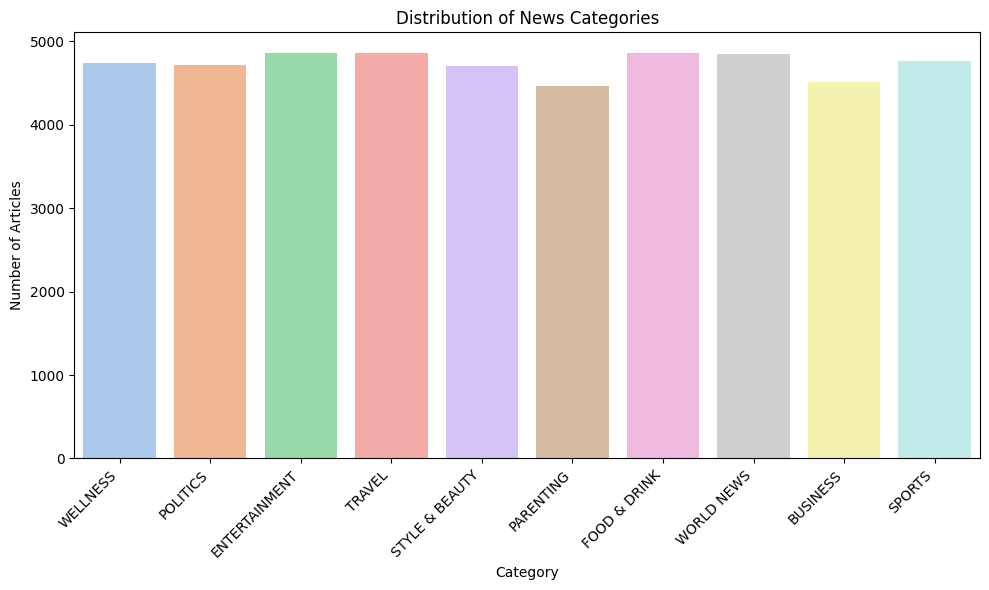

In [56]:
# Visualization of category distribution

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='category',palette = 'pastel')
plt.title('Distribution of News Categories')
plt.xlabel('Category')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [57]:
#     combining both headline and short description

df["combined_text"] = df["headline"] + " " + df["short_description"]

In [58]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
import re

nltk.download('stopwords')
nltk.download('wordnet')
df["combined_text"][1]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gadge\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gadge\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


'Talking to Yourself: Crazy or Crazy Helpful? Think of talking to yourself as a tool to coach yourself through a challenge, or to narrate your own experiences to yourself. In any case, treat yourself with respect and you just may find you enjoy your own company.'

In [59]:


stop_words = set(stopwords.words('english'))

def processed_text(text):
    text = text.lower()
    text= re.sub( r'[^\w\s]',' ',text)
    tokens = text.split()
    tokens = [ WordNetLemmatizer().lemmatize(word) for word in tokens if word not in stop_words ]
    return ' '.join(tokens)

df["processed_text"] = df["combined_text"].apply(processed_text)

In [60]:
df["processed_text"][1]

'talking crazy crazy helpful think talking tool coach challenge narrate experience case treat respect may find enjoy company'

In [61]:
print("First five rows of combined text and proessed text : \n", df[[ "combined_text", "processed_text"]].head())

First five rows of combined text and proessed text : 
                                        combined_text  \
0  143 Miles in 35 Days: Lessons Learned Resting ...   
1  Talking to Yourself: Crazy or Crazy Helpful? T...   
2  Crenezumab: Trial Will Gauge Whether Alzheimer...   
3  Oh, What a Difference She Made If you want to ...   
4  Green Superfoods First, the bad news: Soda bre...   

                                      processed_text  
0  143 mile 35 day lesson learned resting part tr...  
1  talking crazy crazy helpful think talking tool...  
2  crenezumab trial gauge whether alzheimer drug ...  
3  oh difference made want busy keep trying perfe...  
4  green superfoods first bad news soda bread cor...  


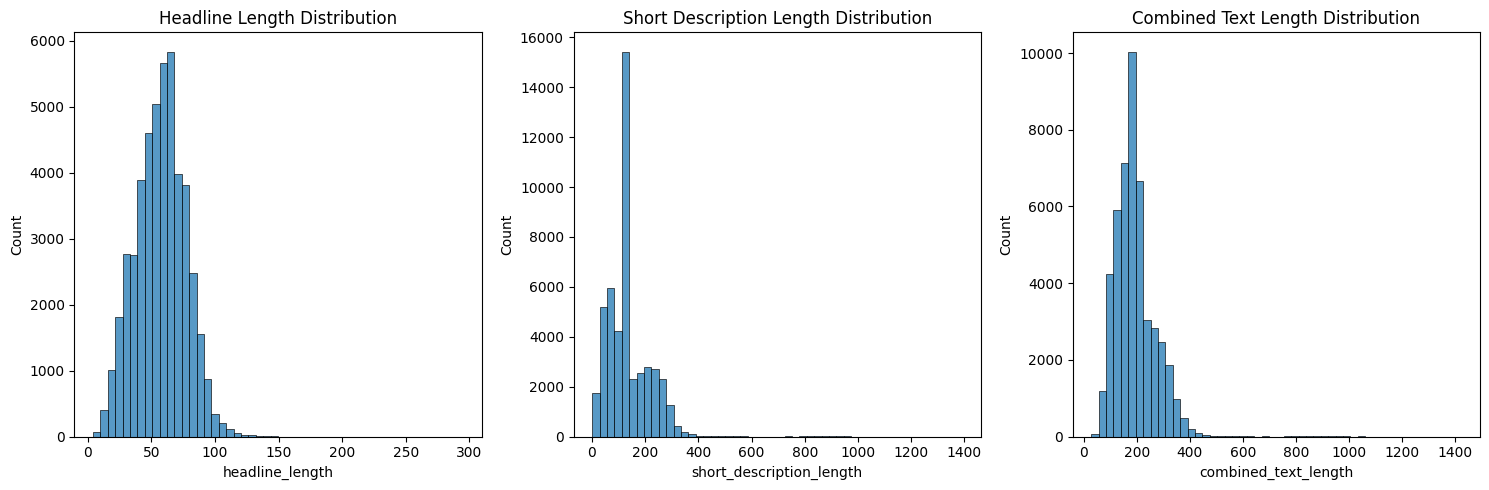

In [62]:

df['headline_length'] = df['headline'].apply(len)
df['short_description_length'] = df['short_description'].apply(len)
df['combined_text_length'] = df['combined_text'].apply(len)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['headline_length'], bins=50)
plt.title('Headline Length Distribution')

plt.subplot(1, 3, 2)
sns.histplot(df['short_description_length'], bins=50)
plt.title('Short Description Length Distribution')

plt.subplot(1, 3, 3)
sns.histplot(df['combined_text_length'], bins=50)
plt.title('Combined Text Length Distribution')

plt.tight_layout()
plt.show()

In [63]:
tfidf_vectorizer = TfidfVectorizer(max_features=10000) 
tfidf_matrix = tfidf_vectorizer.fit_transform(df['processed_text'])

X = tfidf_matrix
y = df['category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nTraining data shape:", X_train.shape, y_train.shape)
print("Testing data shape:", X_test.shape, y_test.shape)


Training data shape: (37865, 10000) (37865,)
Testing data shape: (9467, 10000) (9467,)


In [64]:
lr = LogisticRegression( max_iter = 700 , random_state = 42)
lr.fit(X_train, y_train)
lr_y_predict = lr.predict(X_test)

print("\n--- Logistic Regression ---")
print(" \n Accuracy:", accuracy_score(y_test, lr_y_predict))
print(" \n Classification Report:\n", classification_report(y_test, lr_y_predict))
print(" \n Confussion Matrix:\n ", confusion_matrix(y_test, lr_y_predict))



--- Logistic Regression ---
 
 Accuracy: 0.8214851589732756
 
 Classification Report:
                 precision    recall  f1-score   support

      BUSINESS       0.79      0.79      0.79       908
 ENTERTAINMENT       0.79      0.82      0.80       923
  FOOD & DRINK       0.86      0.86      0.86       987
     PARENTING       0.80      0.79      0.79       900
      POLITICS       0.80      0.77      0.78       955
        SPORTS       0.90      0.90      0.90       968
STYLE & BEAUTY       0.88      0.85      0.87       903
        TRAVEL       0.82      0.82      0.82       958
      WELLNESS       0.74      0.81      0.77       969
    WORLD NEWS       0.84      0.82      0.83       996

      accuracy                           0.82      9467
     macro avg       0.82      0.82      0.82      9467
  weighted avg       0.82      0.82      0.82      9467

 
 Confussion Matrix:
  [[713  10  20  17  45  14   5  21  37  26]
 [ 10 754   7  30  17  24  26  23  21  11]
 [ 12  12 848  

In [65]:
nb = MultinomialNB()
nb.fit(X_train, y_train)
nb_y_predict = nb.predict(X_test)

print("\n--- Naive Bayes ---")
print("Accuracy:", accuracy_score(y_test, nb_y_predict))
print("Classification Report:\n", classification_report(y_test, nb_y_predict))
print("Confussion Matrix:\n", confusion_matrix(y_test, nb_y_predict))


--- Naive Bayes ---
Accuracy: 0.8078588782085138
Classification Report:
                 precision    recall  f1-score   support

      BUSINESS       0.80      0.72      0.75       908
 ENTERTAINMENT       0.81      0.79      0.80       923
  FOOD & DRINK       0.85      0.87      0.86       987
     PARENTING       0.72      0.78      0.75       900
      POLITICS       0.81      0.76      0.78       955
        SPORTS       0.90      0.87      0.88       968
STYLE & BEAUTY       0.87      0.84      0.86       903
        TRAVEL       0.80      0.83      0.81       958
      WELLNESS       0.72      0.78      0.75       969
    WORLD NEWS       0.83      0.84      0.83       996

      accuracy                           0.81      9467
     macro avg       0.81      0.81      0.81      9467
  weighted avg       0.81      0.81      0.81      9467

Confussion Matrix:
 [[651  13  18  34  53  12   5  28  61  33]
 [  9 727   8  27  16  24  51  21  28  12]
 [  8   3 859  22   2   5  12  44

In [66]:
svm = SVC( kernel = 'linear', C=1.0)
svm.fit(X_train, y_train)
svm_y_predict = svm.predict(X_test)

print("\n--- Support Vector Machine ---")
print("Accuracy:", accuracy_score(y_test, svm_y_predict))
print("Classification Report:\n", classification_report(y_test, svm_y_predict))
print("Confussion Matrix:\n" , confusion_matrix(y_test, svm_y_predict))


--- Support Vector Machine ---
Accuracy: 0.8245484313932608
Classification Report:
                 precision    recall  f1-score   support

      BUSINESS       0.77      0.81      0.79       908
 ENTERTAINMENT       0.78      0.82      0.80       923
  FOOD & DRINK       0.86      0.88      0.87       987
     PARENTING       0.79      0.79      0.79       900
      POLITICS       0.80      0.77      0.78       955
        SPORTS       0.91      0.91      0.91       968
STYLE & BEAUTY       0.90      0.86      0.88       903
        TRAVEL       0.84      0.80      0.82       958
      WELLNESS       0.75      0.78      0.77       969
    WORLD NEWS       0.85      0.81      0.83       996

      accuracy                           0.82      9467
     macro avg       0.83      0.82      0.82      9467
  weighted avg       0.83      0.82      0.82      9467

Confussion Matrix:
 [[736  14  18  17  42  10   3  15  35  18]
 [ 18 761   6  31  21  20  16  18  22  10]
 [ 11  12 868  16   3 

In [67]:
print(f'Logistic Regression Accuracy: {accuracy_score(y_test, lr_y_predict)*100:.2f}%' )
print(f'Naive Bayes :  {accuracy_score(y_test, nb_y_predict)*100:.2f}%')
print(f'Support Vector Machine: {accuracy_score(y_test, svm_y_predict)*100:.2f}%' )

Logistic Regression Accuracy: 82.15%
Naive Bayes :  80.79%
Support Vector Machine: 82.45%


In [68]:
new_article = input("Enter a news article: ")
new_article_processed =  processed_text(new_article)
new_article_vectorized = tfidf_vectorizer.transform([new_article_processed])
svm_prediction = svm.predict(new_article_vectorized)
print("\n Category  Prediction:", svm_prediction[:])


 Category  Prediction: ['ENTERTAINMENT']
